[Simple option theory that explans Time value nicely](https://financhill.com/blog/investing/how-does-options-exercise-assignment-work)

# Calcuate the percent of observations that fall within a certain Standard deviation band.    
Making use of of the "magic" of [Gaussian Quadrature](https://www.youtube.com/watch?v=k-yUdqRXijo)   
- To see how Gaussian quadrature can be used in Option pricing you can have a look and [Nuno Reis' Linkedin post about Collocating Local Volatility](https://www.linkedin.com/pulse/three-easy-steps-run-monte-carlo-simulations-faster-full-nuno-reis/)

In [1]:
# Import all packages
import math
from decimal import Decimal
import numpy as np
import pandas as pd 

from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import pylab

from scipy.stats import norm
from scipy.integrate import quad

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import statsmodels.api as sm

from IPython.display import HTML, display

In [2]:
# Numpy example: calculate integral of normal distrubtion
import numpy as np
from scipy.stats import norm
from scipy.integrate import quad
from decimal import Decimal
phi = norm()

standard_deviation= 1.5

value, error = quad(phi.pdf, -standard_deviation, standard_deviation) # Integrate using Gaussian quadrature
print("{}% of observations fall withing the {}SD band".format(round(value,3), standard_deviation))
print("Gaussian Quadrature results in an error of {:.15f} relative to the true value.".format(Decimal(error)))

0.866% of observations fall withing the 1.5SD band
Gaussian Quadrature results in an error of 0.000000000000010 relative to the true value.


In [3]:
error

9.618812385062504e-15

include a solution that plost this as well -> plot Norm dist and shade area I want to find   
-> also use the distribution with explanation of option payoffs (CFA Book)

In [4]:
# Taylor expansion # Plot results expansions for any function
import sympy as sy
import numpy as np
from sympy.functions import sin,cos
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Factorial function
def factorial(n):
    if n <= 0:
        return 1
    else:
        return n*factorial(n-1)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/(factorial(i))*(x-x0)**i
        i += 1
    return p

Taylor expansion at n=1 x
Taylor expansion at n=3 -x**3/6 + x
Taylor expansion at n=5 x**5/120 - x**3/6 + x
Taylor expansion at n=7 -x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=9 x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x
Taylor expansion at n=11 -x**11/39916800 + x**9/362880 - x**7/5040 + x**5/120 - x**3/6 + x


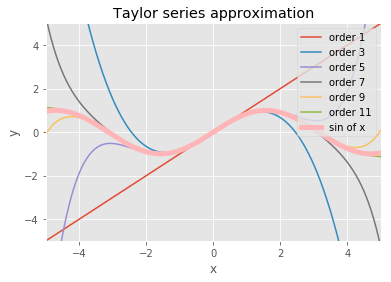

In [5]:
# Plot results
def plot():
    x_lims = [-5,5]
    x1 = np.linspace(x_lims[0],x_lims[1],800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(1,12,2):
        func = taylor(f,0,j)
        print('Taylor expansion at n='+str(j),func)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate the function
    plt.plot(x1,np.sin(x1),label='sin of x',lw=5)
    plt.xlim(x_lims)
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.title('Taylor series approximation')
    plt.show()

plot()

In [13]:
import numpy as np
from math import sqrt, pi,log, e
from enum import Enum
import scipy.stats as stat
from scipy.stats import norm
import time
 
class BSMerton:
    def __init__(self, args):
        self.Type = int(args[0])                # 1 for a Call, - 1 for a put
        self.S = float(args[1])                 # Underlying asset price
        self.K = float(args[2])                 # Option strike K
        self.r = float(args[3])                 # Continuous risk fee rate
        self.q = float(args[4])                 # Dividend continuous rate
        self.T = float(args[5]) / 365.0         # Compute time to expiry
        self.sigma = float(args[6])             # Underlying volatility
        self.sigmaT = self.sigma * self.T ** 0.5# sigma*T for reusability
        self.d1 = (log(self.S / self.K) + 
                   (self.r - self.q + 0.5 * (self.sigma ** 2)) 
                   * self.T) / self.sigmaT
        self.d2 = self.d1 - self.sigmaT
        [self.Delta] = self.delta()
 
    def delta(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [dfq * norm.cdf(self.d1)]
        else:
            return [dfq * (norm.cdf(self.d1) - 1)]
 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
import OptionsAnalytics
from OptionsAnalytics import BSMerton
# Option parameters
sigma = 0.12	# Flat volatility
strike = 105.0	# Fixed strike
epsilon = 0.4	# The % on the left/right of Strike.
# Asset prices are centered around Spot ("ATM Spot")
shortexpiry = 30	# Shortest expiry in days
longexpiry = 720	# Longest expiry in days
riskfree = 0.00	# Continuous risk free rate
divrate = 0.00	# Continuous div rate
# Grid definition
dx, dy = 40, 40	# Steps throughout asset price and expiries axis
#	xx:	Asset	price	axis ,	yy:	expiry	axis ,	zz:	greek	axis
xx, yy = np.meshgrid(np.linspace(strike*(1-epsilon), (1+epsilon)*strike, dx), 
np.linspace(shortexpiry ,	longexpiry ,	dy))
print ("Calculating greeks ...")
zz = np.array([BSMerton([1,x,strike,riskfree,divrate,y,sigma]).Delta for
x,y in zip(np.ravel(xx), np.ravel(yy))])
zz = zz.reshape(xx.shape)
# Plot greek surface
print ("Plotting surface ...")
fig = plt.figure()
fig.suptitle("Call Delta",fontsize=20)
ax = fig.gca(projection="3d")
surf = ax.plot_surface(xx, yy, zz,rstride=1, cstride=1,alpha=0.75,cmap=cm.RdYlBu)
ax.set_xlabel("Asset price")
ax.set_ylabel("Expiry")
ax.set_zlabel("Delta")
# Plot 3D contour
zzlevels = np.linspace(zz.min(),zz.max(),num=8,endpoint=True)
xxlevels = np.linspace(xx.min(),xx.max(),num=8,endpoint=True)
yylevels = np.linspace(yy.min(),yy.max(),num=8,endpoint=True)
cset = ax.contourf(xx, yy, zz, zzlevels, zdir="z",offset=zz.min(),
cmap=cm.RdYlBu,linestyles="dashed")
cset = ax.contourf(xx, yy, zz, xxlevels, zdir="x",offset=xx.min(),
cmap=cm.RdYlBu,linestyles="dashed")
cset = ax.contourf(xx, yy, zz, yylevels, zdir="y",offset=yy.max(),
cmap=cm.RdYlBu,linestyles="dashed")
for c in cset.collections:
    c.set_dashes([(0, (2.0, 2.0))]) # Dash contours
plt.clabel(cset,fontsize=10, inline=1)
ax.set_xlim(xx.min(),xx.max())
ax.set_ylim(yy.min(),yy.max())
ax.set_zlim(zz.min(),zz.max())
#ax.relim()
#ax.autoscale_view(True,True,True)
# Colorbar
colbar = plt.colorbar(surf, shrink=1.0, extend="both", aspect = 10)
l,b,w,h = plt.gca().get_position().bounds
ll,bb,ww,hh = colbar.ax.get_position().bounds
colbar.ax.set_position([ll, b+0.1*h, ww, h*0.8])
# Show chart
plt.show()

ModuleNotFoundError: No module named 'OptionsAnalytics'

In [25]:
# BSM Greeks
import numpy as np
from math import sqrt, pi,log, e
from enum import Enum
import scipy.stats as stat
from scipy.stats import norm
import time
 
class BSMerton:
    def __init__(self, args):
        self.Type = int(args[0])                # 1 for a Call, - 1 for a put
        self.S = float(args[1])                 # Underlying asset price
        self.K = float(args[2])                 # Option strike K
        self.r = float(args[3])                 # Continuous risk fee rate
        self.q = float(args[4])                 # Dividend continuous rate
        self.T = float(args[5]) / 365.0         # Compute time to expiry
        self.sigma = float(args[6])             # Underlying volatility
        self.sigmaT = self.sigma * self.T ** 0.5# sigma*T for reusability
        self.d1 = (log(self.S / self.K) + \
                   (self.r - self.q + 0.5 * (self.sigma ** 2)) \
                   * self.T) / self.sigmaT
        self.d2 = self.d1 - self.sigmaT
        [self.Premium] = self.premium()
        [self.Delta] = self.delta()
        [self.Theta] = self.theta()
        [self.Rho] = self.rho()
        [self.Vega] = self.vega()
        [self.Gamma] = self.gamma()
        [self.Phi] = self.phi()
        [self.Charm] = self.dDeltadTime()
        [self.Vanna] = self.dDeltadVol()
        
    def premium(self):
        tmpprem = self.Type * (self.S * e ** (-self.q * self.T) * norm.cdf(self.Type * self.d1) \self.K * e ** (-self.r * self.T) * norm.cdf(self.Type * self.d2))
        return [tmpprem]
 
    ############################################
    ############ 1st order greeks ##############
    ############################################
 
    def delta(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [dfq * norm.cdf(self.d1)]
        else:
            return [dfq * (norm.cdf(self.d1) - 1)]
 
    # Vega for 1% change in vol
    def vega(self):
        return [0.01 * self.S * e ** (-self.q * self.T) * \
          norm.pdf(self.d1) * self.T ** 0.5]
 
    # Theta for 1 day change
    def theta(self):
        df = e ** -(self.r * self.T)
        dfq = e ** (-self.q * self.T)
        tmptheta = (1.0 / 365.0) \
            * (-0.5 * self.S * dfq * norm.pdf(self.d1) * \
               self.sigma / (self.T ** 0.5) + \self.Type * (self.q * self.S * dfq * norm.cdf(self.Type * self.d1) \- self.r * self.K * df * norm.cdf(self.Type * self.d2)))
        return [tmptheta]
 
    def rho(self):
        df = e ** -(self.r * self.T)
        return [self.Type * self.K * self.T * df * 0.01 * norm.cdf(self.Type * self.d2)]
 
    def phi(self):
        return [0.01* -self.Type * self.T * self.S * \
             e ** (-self.q * self.T) * norm.cdf(self.Type * self.d1)]
 
    ############################################
    ############ 2nd order greeks ##############
    ############################################
 
    ##############
 
    def gamma(self):
        return [e ** (-self.q * self.T) * norm.pdf(self.d1) / (self.S * self.sigmaT)]
 
    # Charm for 1 day change
    def dDeltadTime(self):
        dfq = e ** (-self.q * self.T)
        if self.Type == 1:
            return [(1.0 / 365.0) * -dfq * (norm.pdf(self.d1) * ((self.r-self.q) / (self.sigmaT) - self.d2 / (2 * self.T)) \
                            + (-self.q) * norm.cdf(self.d1))]
        else:
            return [(1.0 / 365.0) * -dfq * (norm.pdf(self.d1) * ((self.r-self.q) / (self.sigmaT) - self.d2 / (2 * self.T)) \
                            + self.q * norm.cdf(-self.d1))]
 
    # Vanna for 1% change in vol
    def dDeltadVol(self):
        return [0.01 * -e ** (-self.q * self.T) * self.d2 / self.sigma * norm.pdf(self.d1)]
 
    # Vomma
    def dVegadVol(self):
        return [0.01 * -e ** (-self.q * self.T) * self.d2 / self.sigma * norm.pdf(self.d1)]

SyntaxError: unexpected character after line continuation character (<ipython-input-25-5280efb1cb31>, line 32)

An Investigation into Interest Rate Modelling: PCA and Vasicek
https://clinthoward.github.io/portfolio/2017/08/19/Rates-Simulations/

In [66]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import quandl

In [67]:
quandl.ApiConfig.api_key = 'SKGKna87Zzg-w_VQ6JMs'

In [68]:
swap_names = ['FRED/DSWP1', 
             'FRED/DSWP2', 
             'FRED/DSWP3', 
             'FRED/DSWP4', 
             'FRED/DSWP5', 
             'FRED/DSWP7', 
             'FRED/DSWP10', 
             'FRED/DSWP30']

swap_df = quandl.get(swap_names)
swap_df = swap_df.dropna()
swap_df.columns = ["SWAP1",
                  "SWAP2",
                  "SWAP3",
                  "SWAP4",
                  "SWAP5",
                  "SWAP7",
                  "SWAP10",
                  "SWAP30"]

In [69]:
swap_df.head()

,SWAP1,SWAP2,SWAP3,SWAP4,SWAP5,SWAP7,SWAP10,SWAP30
DATE,,,,,,,,
2000-07-03,7.10,7.16,7.17,7.17,7.17,7.20,7.24,7.24
2000-07-05,7.03,7.06,7.07,7.07,7.08,7.11,7.14,7.16
2000-07-06,7.07,7.13,7.14,7.15,7.16,7.19,7.21,7.21
2000-07-07,7.01,7.04,7.06,7.06,7.07,7.10,7.14,7.14
2000-07-10,7.04,7.09,7.11,7.13,7.14,7.17,7.20,7.19


In [70]:
swap_df2 = swap_df.copy()

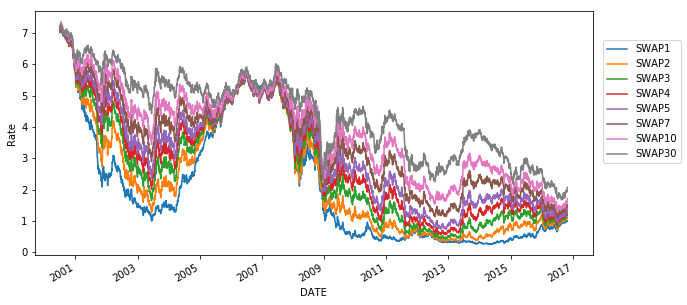

In [71]:
swap_df.plot(figsize=(10,5))
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.show()

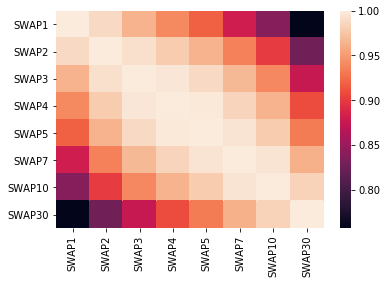

In [72]:
sns.heatmap(swap_df.corr())
plt.show()

Principal Component Analysis - Covariance Method
Implementing the PCA covariance algorithm is quite straight forward.

Detrend the dataset by removing the mean of each column from our observations
Calculate the covariance/correlation matrix
Calculate the eigenvectors & eigenvalues which diagonalise the covariance/correlation matrix. We are wanting to solve 
V-1CV = D
Sort eigenvectors and eigenvalues based on decreasing eigenvalues (i.e. we take the eigenvalue contributing the most variance to out dataset as the first eigenvalue and so forth)

In [73]:
def PCA(df, num_reconstruct):
    
    df -= df.mean(axis=0)
    R = np.cov(df, rowvar=False)
    eigenvals, eigenvecs = sp.linalg.eigh(R)
    eigenvecs = eigenvecs[:, np.argsort(eigenvals)[::-1]]
    eigenvals = eigenvals[np.argsort(eigenvals)[::-1]]
    eigenvecs = eigenvecs[:, :num_reconstruct]

    return np.dot(eigenvecs.T, df.T).T, eigenvals, eigenvecs

In [74]:
scores, evals, evecs = PCA(swap_df, 3)

One of the key interpretations of PCA applied to interest rates, is the components of the yield curve. We can effectively attribute the first three principal components to:

Parallel shifts in yield curve (shifts across the entire yield curve)
Changes in short/long rates (i.e. steepening/flattening of the curve)
Changes in curvature of the model (twists)

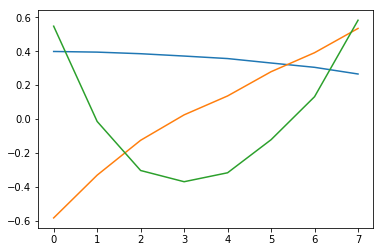

In [75]:
evecs = pd.DataFrame(evecs)
plt.plot(evecs.loc[:, 0:2])
plt.show()

One of the key features of PCA is the ability to reconstruct the initial dataset using the outputs of PCA. Using the simple matrix reconstruction, we can generate an approximation/almost exact replica of the initial data.

No handles with labels found to put in legend.


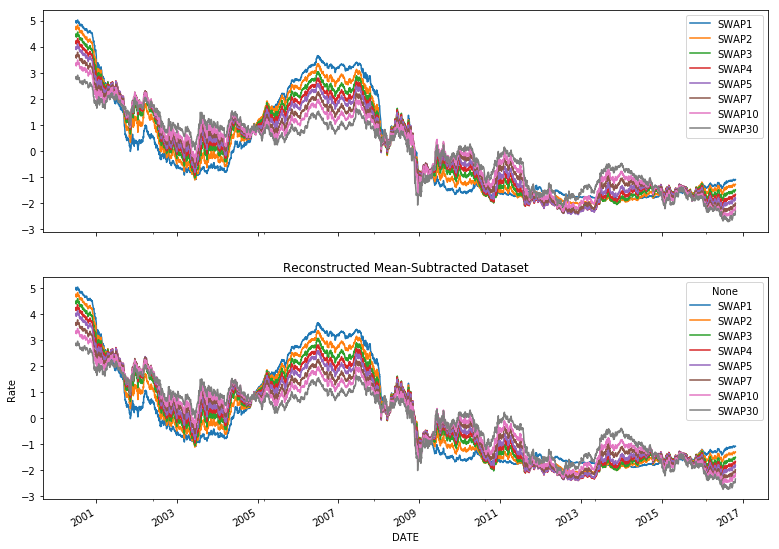

In [78]:
reconst = pd.DataFrame(np.dot(scores,evecs.T), index=swap_df.index, columns=swap_df.columns)


fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=True, sharey=True,figsize=(13,10))

swap_df.plot(ax=ax1)
plt.ylabel("Rate")
plt.legend(bbox_to_anchor=(1.01, 0.9), loc=2)
plt.title("Original Dataset")

reconst.plot(ax=ax2)
plt.ylabel("Rate")
plt.title("Reconstructed Mean-Subtracted Dataset")
plt.show()


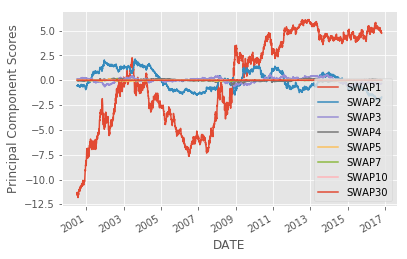

In [71]:
scores = pd.DataFrame(np.dot(evecs.T, swap_df.T).T, index=swap_df.index, columns=swap_df.columns)
scores.plot()
plt.ylabel("Principal Component Scores")
plt.show()

We see that the first 3 principal components account for almost all of the variance in the model, and thus we should just be able to use these three components to reconstruct our initial dataset and retain most of the characteristics of it.

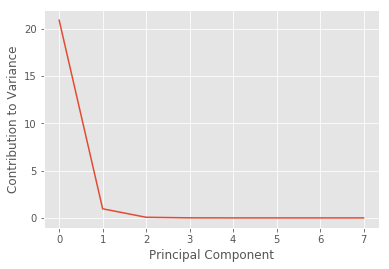

In [72]:
plt.plot(evals)
plt.ylabel("Contribution to Variance")
plt.xlabel("Principal Component")
plt.show()

We implemented the raw model above, but we can also use the sklearn implementation to obtain the same results.

In [74]:
import sklearn.decomposition.pca as PCA

In [78]:
pca = PCA.PCA(n_components=3)
pca.fit(swap_df)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [77]:
PCA??

In [79]:
PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

TypeError: 'module' object is not callable

# ATM delta not 0.5 

[explanation](https://quant.stackexchange.com/questions/3649/why-do-some-people-claim-the-delta-of-an-atm-call-option-is-0-5)
and DFAQ 

# explain money multiplier and reserve ratio   
use excel sheet logic and show geometric series as well as book eco explanation (I think either Krugman or Frenchan) 

# Linear Regression    
explain equity bete with derivations and show BETA function

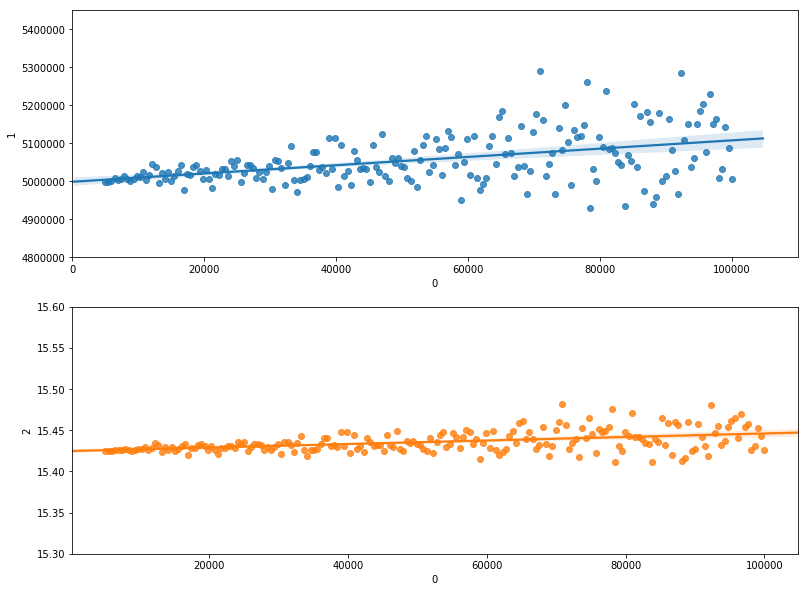

While the variability still increase with x, it is a lot less pronounced in the log chart at the bottom.


In [18]:

# Generate some heteroskedastic scatterplot
x = np.linspace(5000, 100000, 200)


a=5000000 # use intercept that is sufficiently high to ensure we do not have negative values (otherwise the log is not defined)
b=1 # slope 
mu = 0 # meanof normal distribution
sigma = 1 # SD of normal distribution
y = a +b*x + x*np.random.normal(mu,sigma,200)  # simple linear function where scale the increase in the variability be x
y_log = np.log(y) 


df = pd.DataFrame(x)
df[1] = pd.Series(y)
df[2] = pd.Series(y_log)
#plt.plot(y)
#plt.scatter(df[0],df[1])

# Two subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, sharex=False, sharey=False,figsize=(13,10))

sns.regplot(df[0],df[1], data=df, ax = ax1)
sns.regplot(df[0],df[2], data=df, ax = ax2)
#ax2.set_xlim([0, 5])
ax1.set_xlim([0, 110000])
ax1.set_ylim([4800000, 5450000])
ax2.set_ylim([15.3, 15.6])
plt.show()

print("While the variability still increase with x, it is a lot less pronounced in the log chart at the bottom.")

In [8]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('x ~ y', data= df ).fit()

# Inspect the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      x   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.19
Date:                Sun, 06 Jan 2019   Prob (F-statistic):           2.04e-08
Time:                        17:10:33   Log-Likelihood:                -2312.7
No. Observations:                 200   AIC:                             4629.
Df Residuals:                     198   BIC:                             4636.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.849e+05   1.43e+05     -5.480      0.000   -1.07e+06   -5.02e+05
y              0.1659      0.028      5.847      0.000       0.110       0.222
==============================================================================
Omnibus:                       20.116   Durbin-Watson:                   0.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.422
Skew:                           0.326   Prob(JB):                      0.00900
Kurtosis:                       2.160   Cond. No.                     4.00e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  4e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

If this p-value is very small, usually less than or equal to a threshold value previously chosen called the significance level (traditionally 5% or 1% [1]), it suggests that the observed data is inconsistent with the assumption that the null hypothesis is true

In [10]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 9.421641497983677),
 ('Chi^2 two-tail prob.', 0.008997389952423699),
 ('Skew', 0.32626464764843816),
 ('Kurtosis', 2.1604748374602445)]

[Breusch-Pagan Test](https://en.wikipedia.org/wiki/Breusch%E2%80%93Pagan_test)
If the test statistic has a p-value below an appropriate threshold (e.g. p<0.05) then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.

In [12]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)[1]

('p-value', 4.51824950378453e-10)

In [13]:

results_log = smf.ols('x ~ y_log ', data= df ).fit()
summary = results_log.summary()
HTML(
(summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

In [14]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results_log.resid, results_log.model.exog)
lzip(name, test)[1]

('p-value', 2.796985967521218e-10)